In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
!pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data = pd.read_csv("/content/diabetes_data.csv")

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
y = data.Outcome.values
x_data = data.drop(["Outcome"],axis=1)


In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


                    feature        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


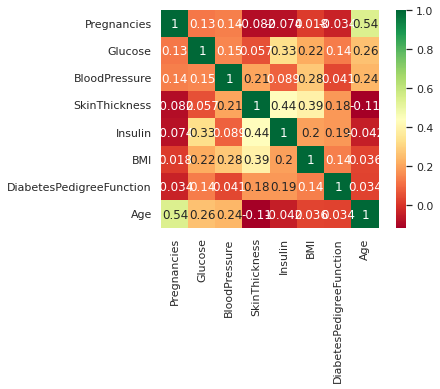

In [8]:
import seaborn as sns
sns.set(context="notebook",palette="Spectral",style="darkgrid",font_scale=1,color_codes=True)
p=sns.heatmap(x_data.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [9]:
x_data1 = x_data.drop(["BMI"],axis=1)

                    feature        VIF
0               Pregnancies   3.272901
1                   Glucose  13.573749
2             BloodPressure  12.372453
3             SkinThickness   3.475236
4                   Insulin   2.033589
5  DiabetesPedigreeFunction   3.151598
6                       Age  13.381319


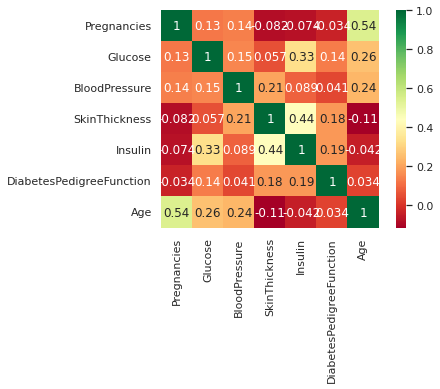

In [10]:
p=sns.heatmap(x_data1.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data1
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [11]:
x_data2 = x_data1.drop(["Glucose"],axis=1)

                    feature        VIF
0               Pregnancies   3.266130
1             BloodPressure   9.940457
2             SkinThickness   3.475014
3                   Insulin   1.859553
4  DiabetesPedigreeFunction   3.026709
5                       Age  10.896809


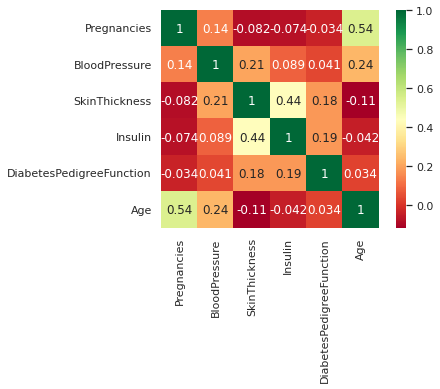

In [13]:
p=sns.heatmap(x_data2.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data2
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)

In [14]:
x_data3 = x_data2.drop(["Age"],axis=1)

                    feature       VIF
0               Pregnancies  2.306086
1             BloodPressure  5.288085
2             SkinThickness  3.447548
3                   Insulin  1.857940
4  DiabetesPedigreeFunction  2.897474


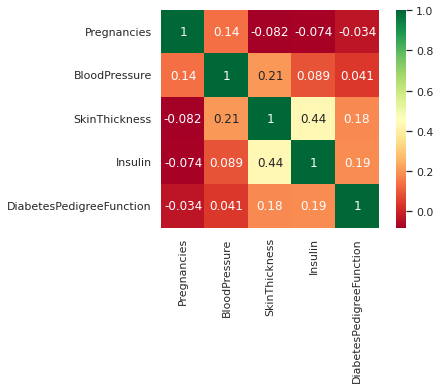

In [15]:
p=sns.heatmap(x_data3.corr(), annot=True,cmap='RdYlGn',square=True) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=x_data3
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)

                          for i in range(len(X.columns))]
  
print(vif_data)


Normalization of x_data Feature's

In [16]:
x = (x_data3 - np.min(x_data3)) / (np.max(x_data3) - np.min(x_data3)).values

In [17]:
x.shape

(768, 5)

In [18]:
x.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction
0,0.352941,0.590164,0.353535,0.000000,0.234415
1,0.058824,0.540984,0.292929,0.000000,0.116567
2,0.470588,0.524590,0.000000,0.000000,0.253629
3,0.058824,0.540984,0.232323,0.111111,0.038002
4,0.000000,0.327869,0.353535,0.198582,0.943638


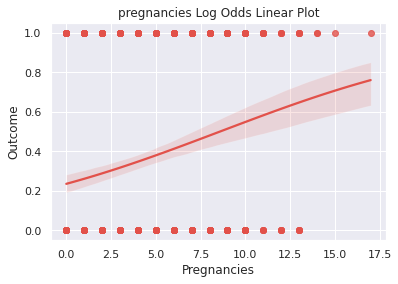

In [20]:
gre = sns.regplot(x= 'Pregnancies', y= 'Outcome', data= data, logistic= True).set_title("pregnancies Log Odds Linear Plot")





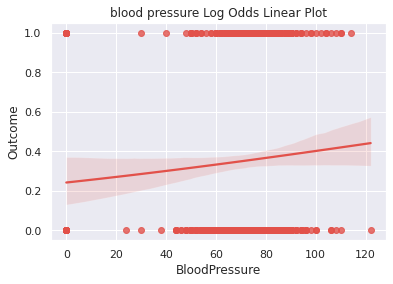

In [23]:
pre = sns.regplot(x= 'BloodPressure', y= 'Outcome', data= data, logistic= True).set_title("blood pressure Log Odds Linear Plot")
pre.figure.savefig("gre log lin.png")

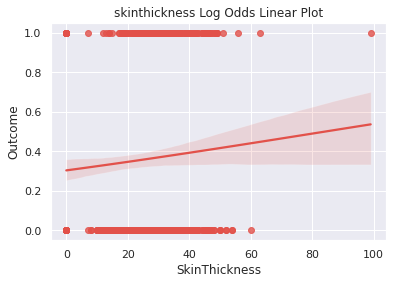

In [24]:
sre = sns.regplot(x= 'SkinThickness', y= 'Outcome', data= data, logistic= True).set_title("skinthickness Log Odds Linear Plot")
sre.figure.savefig("gre log lin.png")

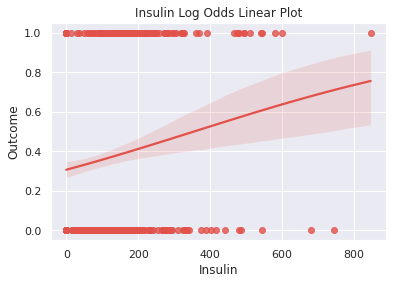

In [25]:
cre = sns.regplot(x= 'Insulin', y= 'Outcome', data= data, logistic= True).set_title("Insulin Log Odds Linear Plot")
cre.figure.savefig("gre log lin.png")

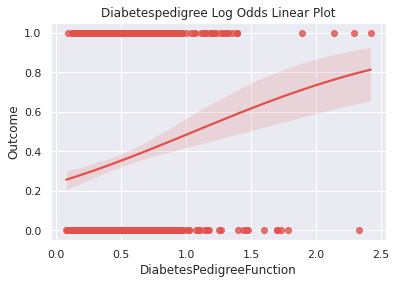

In [26]:
dre = sns.regplot(x= 'DiabetesPedigreeFunction', y= 'Outcome', data= data, logistic= True).set_title("Diabetespedigree Log Odds Linear Plot")

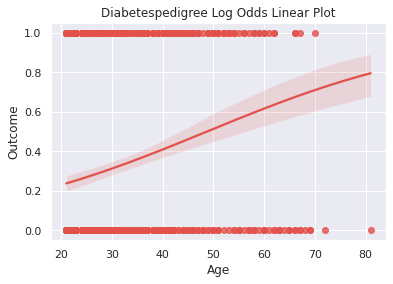

In [30]:
dre = sns.regplot(x= 'Age', y= 'Outcome', data= data, logistic= True).set_title("Age Log Odds Linear Plot")

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


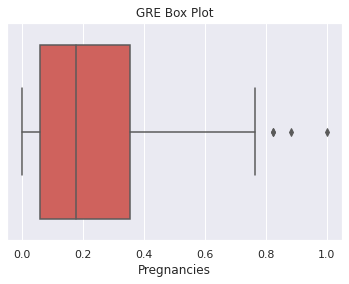

In [37]:


gre_box = sns.boxplot(x= 'Pregnancies', data= x, orient= 'v').set_title("GRE Box Plot")


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


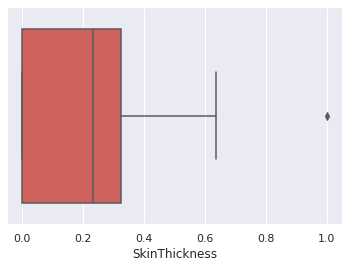

In [39]:

gre_box = sns.boxplot(x= 'SkinThickness', data= x, orient= 'v')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


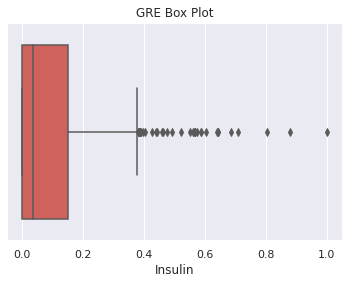

In [40]:
gre_box = sns.boxplot(x= 'Insulin', data= x, orient= 'v').set_title("GRE Box Plot")
gre_box.figure.savefig("GRE Box Plot.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


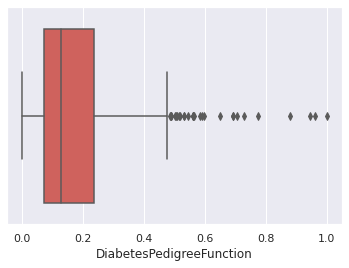

In [41]:
gre_box = sns.boxplot(x= 'DiabetesPedigreeFunction', data= x, orient= 'v')

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


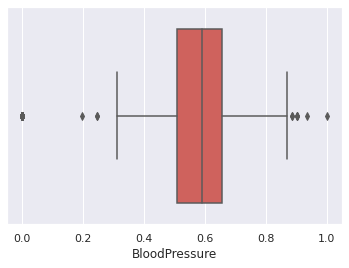

In [42]:
gre_box = sns.boxplot(x= 'BloodPressure', data= x, orient= 'v')

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T


In [46]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

def sigmoid(z):
    
    y_head = 1 / (1+np.exp(-z))
    
    return y_head

In [47]:
#%% Forward and Backward Propagation

def forward_backward_propagation(w,b,x_train,y_head):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = (-y_train*np.log(y_head)) - ((1-y_train)*np.log(1-y_head))
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [48]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
          
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
   

In [53]:
#%% Prediction

def predict(w,b,x_test):

    # x_test is a input for forward propagation
  z = sigmoid(np.dot(w.T,x_test)+b)
  Y_prediction = np.zeros((1,x_test.shape[1]))
  Residuals=np.array(z - y_test)
  print(z-y_test)
  error=Residuals.tolist()
  x=np.arange(1,155)
  plt.scatter(x,error)
  plt.show()
  
 
  
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
  for i in range(z.shape[1]):
    if z[0,i]<= 0.5:
      Y_prediction[0,i] = 0
    else:
      Y_prediction[0,i] = 1
  return Y_prediction

In [54]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    z = sigmoid(np.dot(w.T,x_test)+b)
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    print(parameters["weight"],parameters["bias"])
    from sklearn import metrics
    cm = metrics.confusion_matrix(y_test.T, y_prediction_test.T)
    print(cm)
    
    fpr, tpr, _ = metrics.roc_curve(y_test.T,  y_prediction_test.T)

    #create ROC curve
    import scikitplot as skplt
    import matplotlib.pyplot as plt 
    plt.plot(fpr,tpr)
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
  
     

Cost after iteration 0: 0.694625
Cost after iteration 100: 0.636294
Cost after iteration 200: 0.627071
Cost after iteration 300: 0.620863
Cost after iteration 400: 0.616632
Cost after iteration 500: 0.613707
Cost after iteration 600: 0.611654
Cost after iteration 700: 0.610193
Cost after iteration 800: 0.609139
Cost after iteration 900: 0.608367
Cost after iteration 1000: 0.607796
Cost after iteration 1100: 0.607368
Cost after iteration 1200: 0.607044
Cost after iteration 1300: 0.606796
Cost after iteration 1400: 0.606604
Cost after iteration 1500: 0.606455
Cost after iteration 1600: 0.606337
Cost after iteration 1700: 0.606244
Cost after iteration 1800: 0.606170
Cost after iteration 1900: 0.606110
Cost after iteration 2000: 0.606062
Cost after iteration 2100: 0.606023
Cost after iteration 2200: 0.605991
Cost after iteration 2300: 0.605965
Cost after iteration 2400: 0.605943
Cost after iteration 2500: 0.605925
Cost after iteration 2600: 0.605910
Cost after iteration 2700: 0.605898
Cost

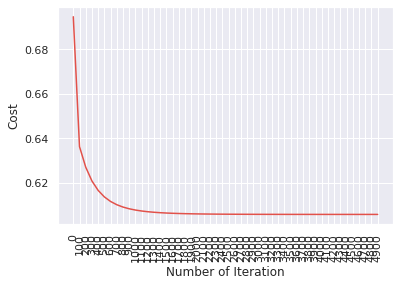

[[ 0.43653434  0.20935005  0.2028471   0.5397743   0.3728003   0.42837424
   0.2160031   0.22680384  0.33940982  0.30141304 -0.56559116  0.36811335
  -0.63199191  0.49308895  0.30711143 -0.63014351  0.25023872  0.34888176
  -0.79166887 -0.75994693  0.28540316  0.24681346  0.54693701  0.22653815
   0.528071   -0.60256597  0.3107179   0.20025524 -0.74637391  0.33755526
  -0.7025865  -0.66871353 -0.60607561 -0.78769899  0.35052625 -0.34704737
  -0.72400866 -0.71093072  0.53826758 -0.86165524  0.28932951  0.25561299
   0.36442734 -0.38913     0.33895799 -0.52511601 -0.3919429   0.32516144
   0.52715824  0.45395897  0.24968307 -0.36466153 -0.26720558 -0.72946681
   0.22730222  0.26707849  0.29178709  0.18148312  0.37608821 -0.72698173
  -0.55636035  0.23568041  0.56870026 -0.23876001  0.22009331  0.20569878
   0.21976118 -0.66750094  0.23114541 -0.48412514  0.61230162  0.29911033
   0.41211423 -0.80236143  0.32523288  0.34822488  0.27829146  0.41497584
   0.27176294  0.28117179 -0.61564751 

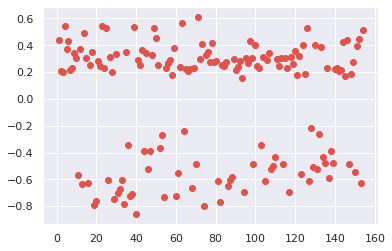

test accuracy: 70.77922077922078 %
[[ 2.32429492]
 [ 0.55095655]
 [-0.0025567 ]
 [ 1.54413677]
 [ 2.13206587]] -2.0038957477654793
[[90  9]
 [36 19]]


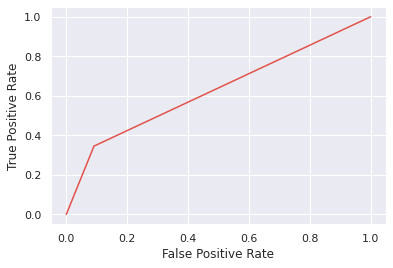

In [69]:
y=logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.3, num_iterations = 5000)

Specificity=0.67
sensitivity=0.71
precision=0.91